In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from spyral.core.run_stacks import form_run_string
import h5py as h5
import plotly.express as px
from spyral.core.point_cloud import PointCloud

from skimage.measure import LineModelND, ransac
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import numpy.random as random
import numpy as np
import matplotlib.pyplot as plt
import mplcursors
from pathlib import Path

%matplotlib widget

In [2]:
# run_to_examine = 30
# event = 69

In [3]:
# workspace_path = Path("/Volumes/researchEXT/24Mg/mg24_spyral/")
# pointcloud_path = workspace_path / "Pointcloud"
# point_file_path = pointcloud_path / f"{form_run_string(run_to_examine)}.h5"
# point_file = h5.File(point_file_path, 'r')
# cloud_group: h5.Group = point_file.get('cloud')
# min_event = cloud_group.attrs['min_event']
# max_event = cloud_group.attrs['max_event']
# event_iterator = iter(range(min_event, max_event+1))
# print(f"First event: {min_event} Last event: {max_event}")

In [4]:
# if event is None:
#     try:
#         event = next(event_iterator)
#     except StopIteration:
#         raise Exception("You ran out of events (wow!) for this file! Select a new file to analyze.")
# print(f'Event {event}')
# event_name = f"cloud_{event}"
# if not event_name in cloud_group:
#     raise Exception("This was a downscale beam event and has been removed from the analysis! Run this cell again to select a new event.")
# event_data = cloud_group[f'cloud_{event}']
# cloud = PointCloud(event, event_data[:].copy())
# print(f'Cloud size: {len(cloud)}')
# # Close any open plots to avoid memory problems
# plt.close()

In [5]:
# fig, axs = plt.subplot_mosaic(
#     """
#     AAB
#     """,
#     per_subplot_kw={
#         "A": {
#             "projection": "3d", 
#             "box_aspect": (2,1,1),
#             "aspect": "equalxy"
#         }
#     },
#     figsize=(15.0, 5.0),
#     constrained_layout=True
# )
# axs["A"].scatter(cloud.data[:, 2], cloud.data[:, 0], cloud.data[:, 1], c=cloud.data[:, 3], s=3, label="Pointcloud")
# axs["A"].set_xlim3d(0., 1000.0)
# axs["A"].set_xlabel("Z(mm)")
# axs["A"].set_ylim3d(-300.0, 300.0)
# axs["A"].set_ylabel("X(mm)")
# axs["A"].set_zlim3d(-300.0, 300.0)
# axs["A"].set_zlabel("Y(mm)")
# axs["B"].scatter(cloud.data[:, 0], cloud.data[:, 1], c=cloud.data[:, 3], s=3)
# axs["B"].set_xlim(-300.0, 300.0)
# axs["B"].set_xlabel("X(mm)")
# axs["B"].set_ylim(-300.0, 300.0)
# axs["B"].set_ylabel("Y(mm)")
# plt.suptitle(f"Event {event} Clustered Pointcloud")
# axs["B"].grid()

In [6]:
# # model_robust, inliers = ransac(
# #     X, LineModelND, min_samples=2, residual_threshold=10, max_trials=1000)


# # outliers = inliers == False
# X = cloud.data[:,:3]
# # mask = (X[:,:3] > 50) | (X[:,:3] < -50)
# # X = X[np.all(mask, axis=1)]

# min_points = len(X) * 0.15
# print(f"Minimum points for RANSAC: {min_points}") 

In [7]:
# for _ in range(6):
#     try:
#         model_robust, inliers = ransac(
#         X, LineModelND, min_samples=2, residual_threshold=12, max_trials=1000)

#         outliers = inliers == False
#         print(f"Number of inliers: {len(inliers)}")
#         if len(inliers) < min_points:
#             print("Not enough inliers found, stopping RANSAC iterations.")
#             X = X[outliers]
#             continue
        
#         fig = plt.figure()
#         ax = fig.add_subplot(111, projection='3d')
#         ax.scatter(
#             X[outliers][:, 2],
#             X[outliers][:, 0],
#             X[outliers][:, 1],
#             c='r',
#             marker='o',
#             zorder=0,
#             label='Outlier data',
#         )

#         ax.scatter(
#             X[inliers][:, 2],
#             X[inliers][:, 0],
#             X[inliers][:, 1],
#             c='b',
#             marker='o',
#             zorder=1,
#             label='Inlier data',
#         )
# # 
#         ax.set_xlim3d(0., 1000.0)
#         ax.set_ylim3d(-300.0, 300.0)
#         ax.set_zlim3d(-300.0, 300.0)
#         ax.legend(loc='lower left')
#         plt.show()
        
#         X = X[outliers]

#     except ValueError as e:
#         print(f"RANSAC failed: {e}")
#         continue

## RANSAC with 6 clusters

In [8]:
output_file = "/Volumes/researchEXT/24Mg/ransac_runs/0030.h5"
ransac_file = h5.File(output_file, 'r')
group_ransac = list(ransac_file.keys())[0]
groupn_ransac = ransac_file[group_ransac]

event_group = list(groupn_ransac.keys())

six_track_events = []

for event in event_group:
    event_data = groupn_ransac[event]
    nclus = event_data.attrs['n_clusters']
    if nclus == 6:
        six_track_events.append(event)
    

In [105]:
event = six_track_events[-102]

Event cloud_9106
Cloud size: 287


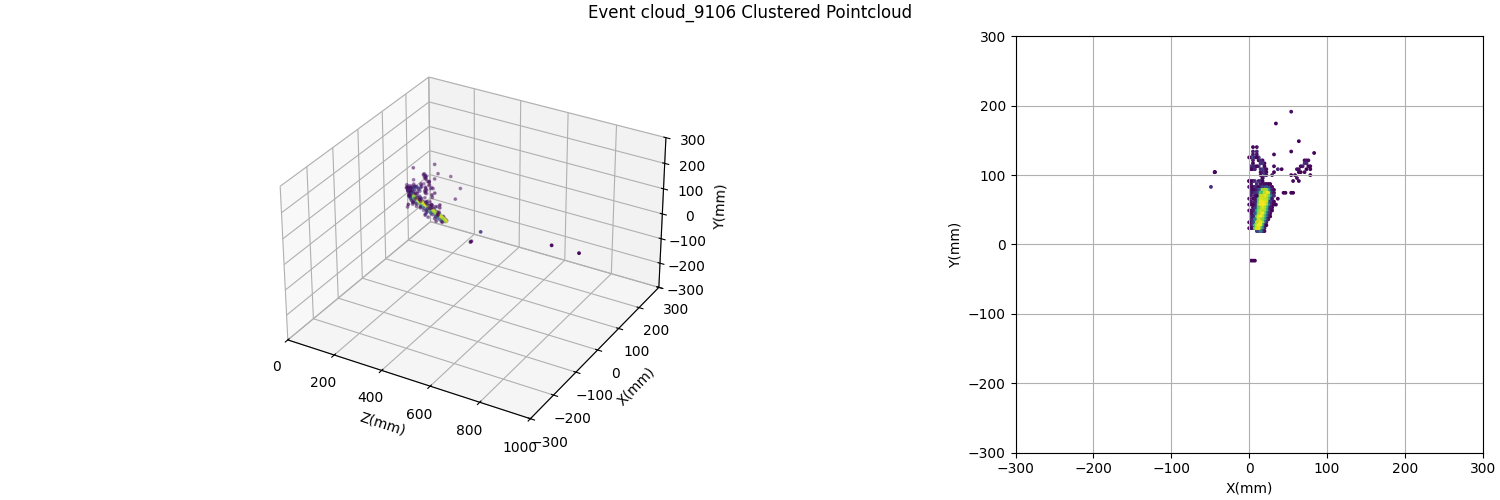

In [106]:

run_to_examine = 30

workspace_path = Path("/Volumes/researchEXT/24Mg/mg24_spyral/")
pointcloud_path = workspace_path / "Pointcloud"
point_file_path = pointcloud_path / f"{form_run_string(run_to_examine)}.h5"
point_file = h5.File(point_file_path, 'r')
cloud_group: h5.Group = point_file.get('cloud')
min_event = cloud_group.attrs['min_event']
max_event = cloud_group.attrs['max_event']
event_iterator = iter(range(min_event, max_event+1))

if event is None:
    try:
        event = next(event_iterator)
    except StopIteration:
        raise Exception("You ran out of events (wow!) for this file! Select a new file to analyze.")
print(f'Event {event}')
event_name = event
if not event_name in cloud_group:
    raise Exception("This was a downscale beam event and has been removed from the analysis! Run this cell again to select a new event.")
event_data = cloud_group[event]
cloud = PointCloud(event, event_data[:].copy())
print(f'Cloud size: {len(cloud)}')
# Close any open plots to avoid memory problems
plt.close()

fig, axs = plt.subplot_mosaic(
    """
    AAB
    """,
    per_subplot_kw={
        "A": {
            "projection": "3d", 
            "box_aspect": (2,1,1),
            "aspect": "equalxy"
        }
    },
    figsize=(15.0, 5.0),
    constrained_layout=True
)
axs["A"].scatter(cloud.data[:, 2], cloud.data[:, 0], cloud.data[:, 1], c=cloud.data[:, 3], s=3, label="Pointcloud")
axs["A"].set_xlim3d(0., 1000.0)
axs["A"].set_xlabel("Z(mm)")
axs["A"].set_ylim3d(-300.0, 300.0)
axs["A"].set_ylabel("X(mm)")
axs["A"].set_zlim3d(-300.0, 300.0)
axs["A"].set_zlabel("Y(mm)")
axs["B"].scatter(cloud.data[:, 0], cloud.data[:, 1], c=cloud.data[:, 3], s=3)
axs["B"].set_xlim(-300.0, 300.0)
axs["B"].set_xlabel("X(mm)")
axs["B"].set_ylim(-300.0, 300.0)
axs["B"].set_ylabel("Y(mm)")
plt.suptitle(f"Event {event} Clustered Pointcloud")
axs["B"].grid()